In [ ]:
#importing libraries I will be using
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

In [ ]:
#reading the data

data = pd.read_csv('/content/drive/MyDrive/Internship/Week_1/Task1_data/firstintenproject.csv')

In [ ]:
#printing the dirst 10 rows

data.head(10)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
5,INN00006,1,0,0,2,Meal Plan 2,0,Room_Type 1,346,Offline,0,0,0,100.00,1,9/13/2016,Canceled
6,INN00007,1,1,1,4,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
7,INN00008,3,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
8,INN00009,1,1,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


In [ ]:
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

Remidnder :

Lead time → the number of days between the booking date and the actual check-in date.

P_c → Number of previous cancellations a customer has made.

P_no_c → Number of previous non-cancellations (successful bookings where the customer actually stayed).


In [ ]:
#dropping the cost value column
new_data = data.drop(['Booking_ID'], axis=1)
new_data.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [ ]:
new_data.isnull().sum()

,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0
repeated,0


In [ ]:
new_data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
36280,True
36281,False
36282,True
36283,False


In [ ]:
#As there're duplicated data, I am collecting it in a new object to check the state of it and see if it's necessary to keep or not
duplicates = new_data[new_data.duplicated()]
duplicates.head(10)

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
20,2,0,2,2,Meal Plan 1,0,Room_Type 1,99,Online,0,0,0,65.0,0,10/30/2017,Canceled
154,2,0,0,1,Meal Plan 2,0,Room_Type 1,55,Offline,0,0,0,104.0,0,4/6/2018,Not_Canceled
272,2,0,1,2,Meal Plan 2,0,Room_Type 1,161,Online,0,0,0,130.0,0,3/25/2018,Canceled
301,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,Online,0,0,0,130.0,0,6/15/2018,Canceled
319,2,0,0,2,Meal Plan 2,0,Room_Type 1,320,Online,0,0,0,115.0,1,8/18/2018,Canceled
322,2,0,0,2,Meal Plan 1,0,Room_Type 1,245,Online,0,0,0,75.0,0,6/17/2018,Canceled
327,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,Online,0,0,0,130.0,0,6/15/2018,Canceled
331,2,0,0,2,Meal Plan 2,0,Room_Type 1,273,Online,0,0,0,109.0,0,7/17/2017,Canceled
398,2,0,1,2,Meal Plan 1,0,Room_Type 1,273,Online,0,0,0,95.0,0,5/13/2018,Canceled
418,2,0,2,0,Meal Plan 2,0,Room_Type 1,386,Online,0,0,0,115.0,1,10/23/2018,Canceled


In [ ]:
#As i was checking I found 2 exact similar rows, that could cause confusion and results in overfitting later on , so I decided to check the percentage of duplicates rows to see if it's safe to drop them
(new_data.duplicated().sum() / len(new_data)) * 100

28.320242524459143

#As the percentage was actually not a small amount, I will be comparing the visualization before and after removing duplicates

In [ ]:
#creating a new object to save the data after dropping duplications in it
non_dup = new_data.drop_duplicates()
non_dup.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [ ]:
non_dup.duplicated().sum()

0

# Data visualization before removing duplicates

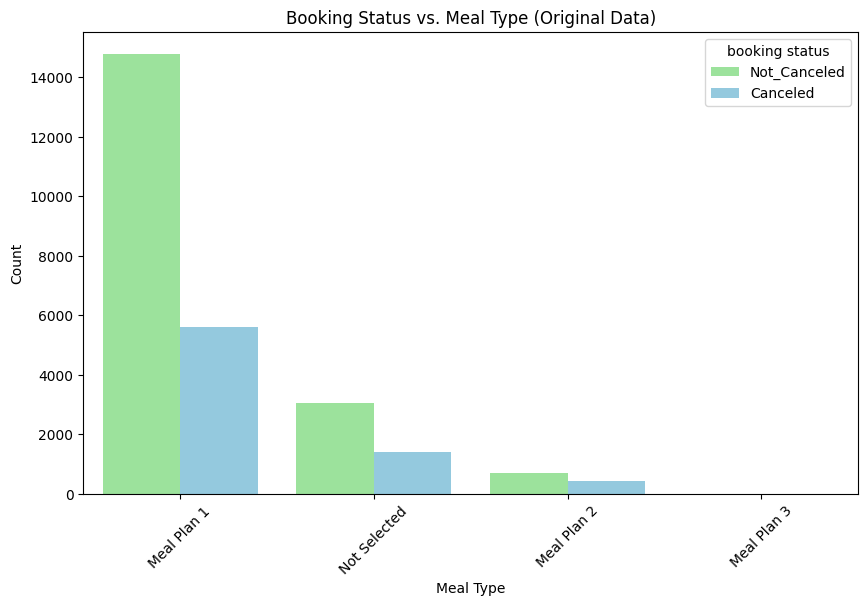

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(x='type of meal', hue='booking status', data=new_data, palette={'Canceled': 'skyblue', 'Not_Canceled': 'lightgreen'})
plt.title("Booking Status vs. Meal Type (Original Data)")
plt.xlabel("Meal Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

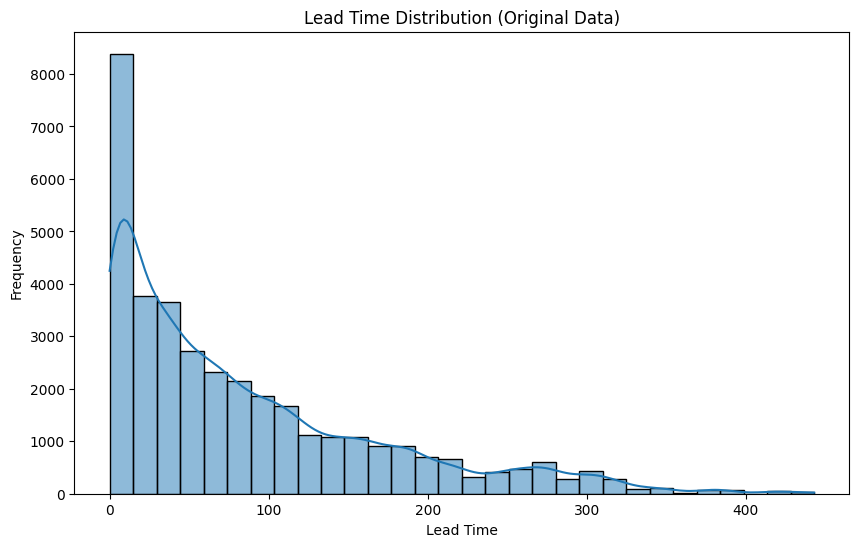

In [ ]:
#lead time distribution
plt.figure(figsize=(10, 6))
sns.histplot(new_data['lead time'], kde=True, bins=30)
plt.title("Lead Time Distribution (Original Data)")
plt.xlabel("Lead Time")
plt.ylabel("Frequency")
plt.show()

In [ ]:
new_data.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price ', 'special requests', 'date of reservation',
       'booking status'],
      dtype='object')

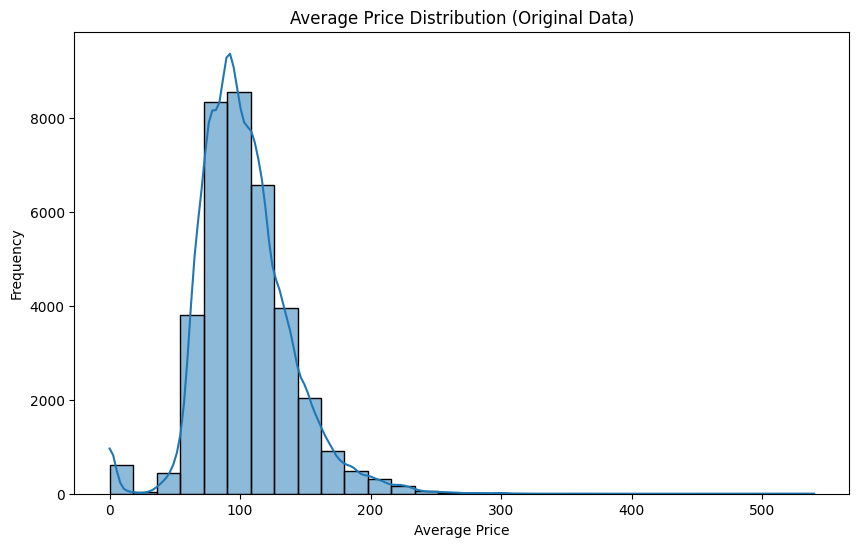

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(new_data['average price '], kde=True, bins=30)
plt.title("Average Price Distribution (Original Data)")
plt.xlabel("Average Price")
plt.ylabel("Frequency")
plt.show()

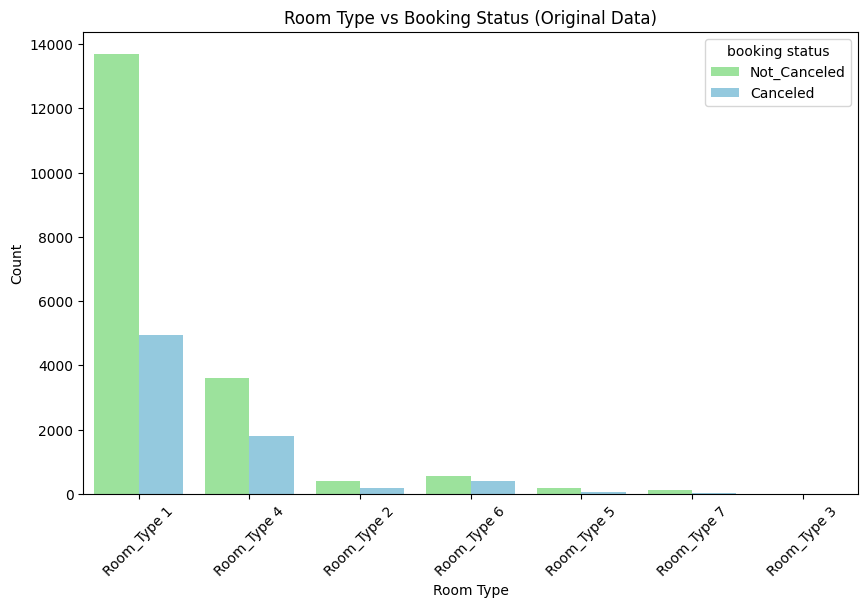

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='room type', hue='booking status', data=new_data, palette={'Canceled': 'skyblue', 'Not_Canceled': 'lightgreen'})
plt.title("Room Type vs Booking Status (Original Data)")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

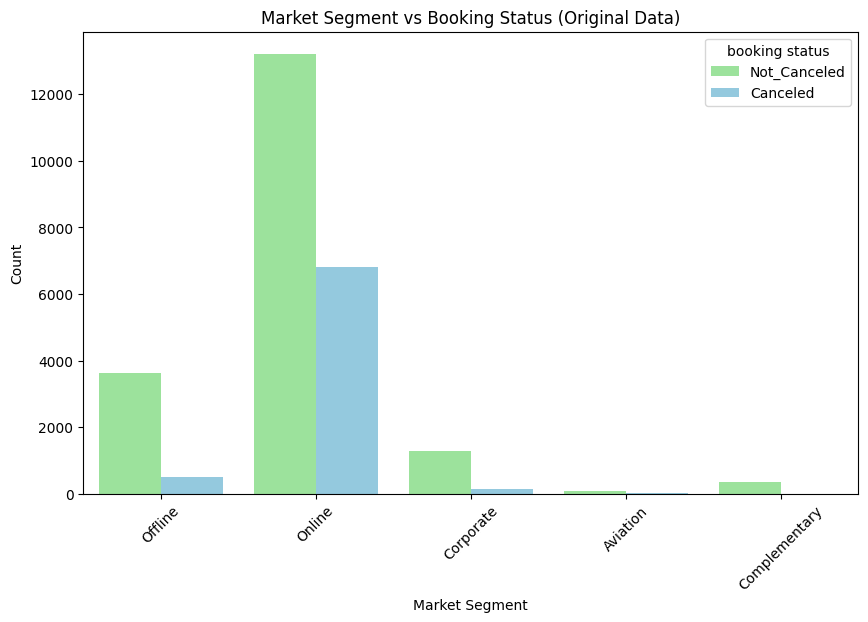

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='market segment type', hue='booking status', data=new_data,palette={'Canceled': 'skyblue', 'Not_Canceled': 'lightgreen'})
plt.title("Market Segment vs Booking Status (Original Data)")
plt.xlabel("Market Segment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#Data visualization after removing duplicates

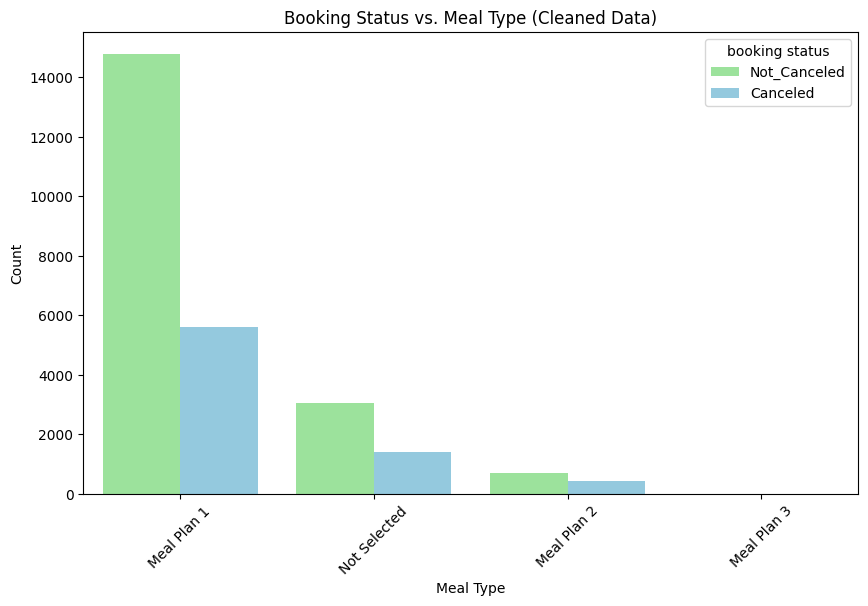

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type of meal', hue='booking status', data=non_dup,palette={'Canceled': 'skyblue', 'Not_Canceled': 'lightgreen'})
plt.title("Booking Status vs. Meal Type (Cleaned Data)")
plt.xlabel("Meal Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

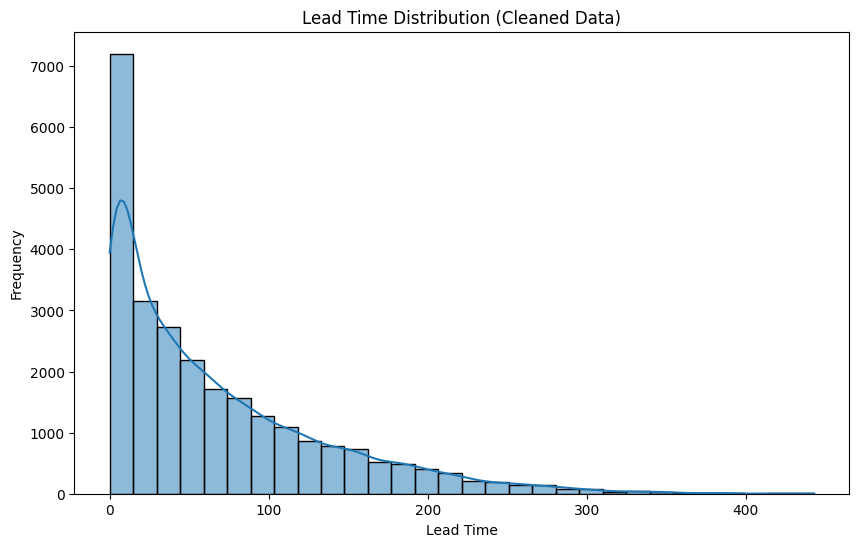

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(non_dup['lead time'], kde=True, bins=30)
plt.title("Lead Time Distribution (Cleaned Data)")
plt.xlabel("Lead Time")
plt.ylabel("Frequency")
plt.show()

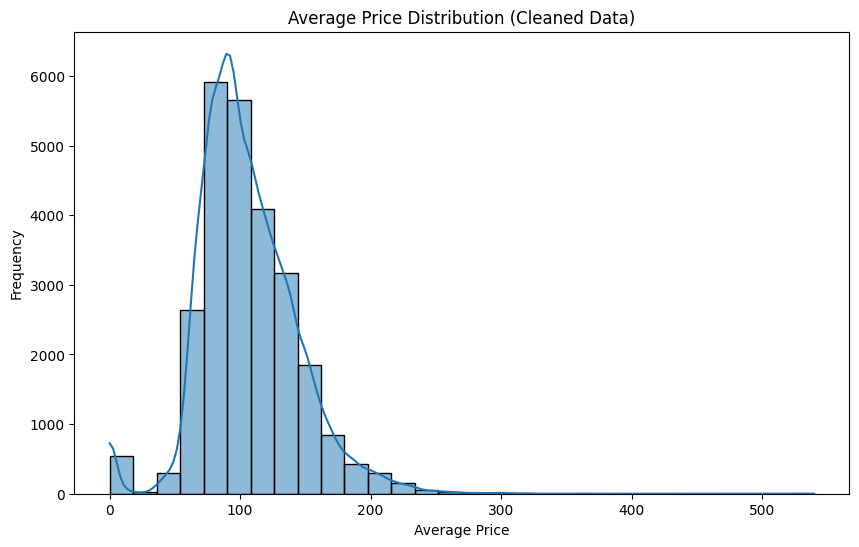

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(non_dup['average price '], kde=True, bins=30)
plt.title("Average Price Distribution (Cleaned Data)")
plt.xlabel("Average Price")
plt.ylabel("Frequency")
plt.show()

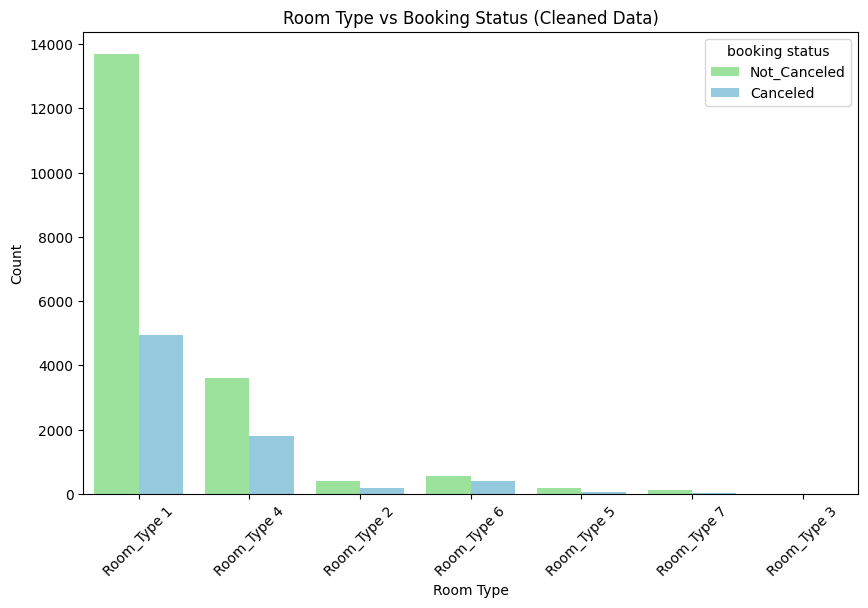

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='room type', hue='booking status', data=non_dup, palette={'Canceled': 'skyblue', 'Not_Canceled': 'lightgreen'})
plt.title("Room Type vs Booking Status (Cleaned Data)")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

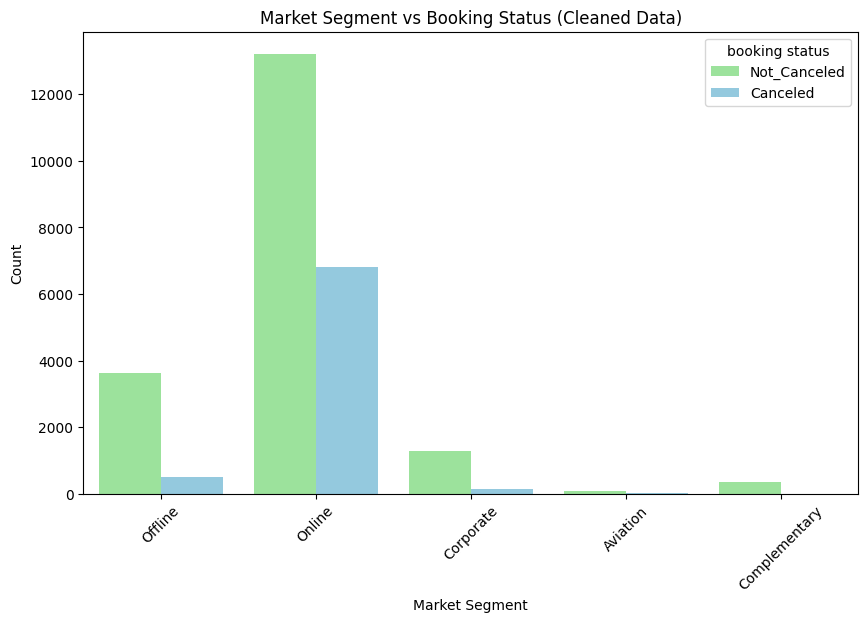

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='market segment type', hue='booking status', data=non_dup, palette={'Canceled': 'skyblue', 'Not_Canceled': 'lightgreen'})
plt.title("Market Segment vs Booking Status (Cleaned Data)")
plt.xlabel("Market Segment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#After consideration, I will be working with data after dropping duplicated.

In [ ]:
new_data = new_data.drop_duplicates()
new_data.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


#Outliers

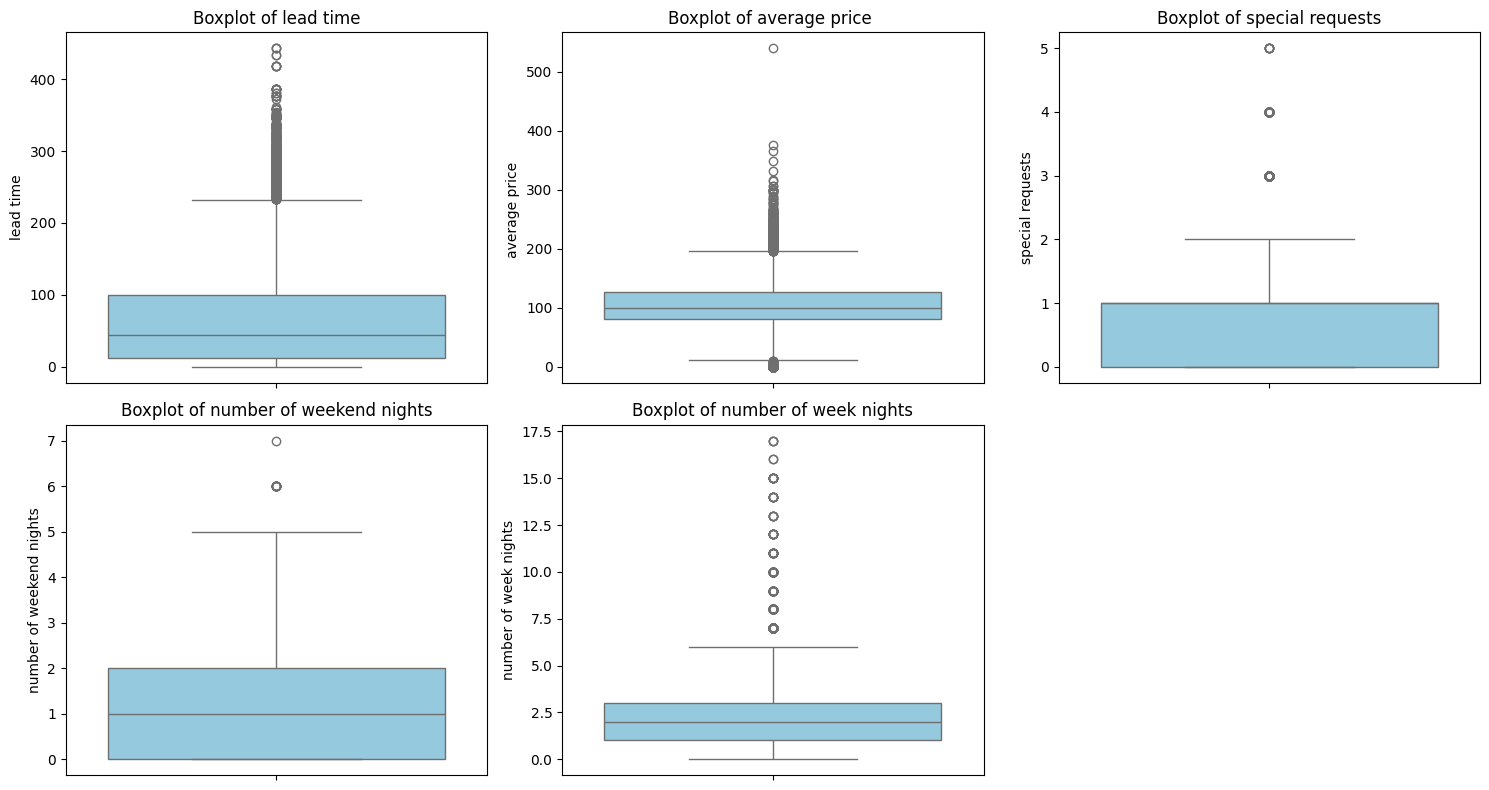

In [ ]:
#Checking and fixing outliers on numerical columns

numerical_cols = ['lead time', 'average price ', 'special requests', 'number of weekend nights', 'number of week nights']

plt.figure(figsize=(15,8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=new_data[col],color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

#Fixing outliers using IQR method

Not all outliers will be necessirally removed, as some are considered as important data ponts that model should be considering.

In [ ]:
cleaned_data = new_data.copy()

columns_to_check = ['lead time', 'average price ']

for column in columns_to_check:
    Q1 = cleaned_data[column].quantile(0.25)
    Q3 = cleaned_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (new_data[column] <= upper_bound)]


cleaned_data.describe()



<ipython-input-84-ca9b8547bf32>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (new_data[column] <= upper_bound)]


,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,24163.000000,24163.000000,24163.00000,24163.000000,24163.00000,24163.000000,24163.000000,24163.000000,24163.000000,24163.000000,24163.000000
mean,1.894508,0.116873,0.89306,2.268510,0.04151,60.826884,0.029880,0.027190,0.189174,105.757915,0.739560
std,0.525648,0.412231,0.88816,1.510221,0.19947,57.713678,0.170261,0.413093,1.992830,31.049488,0.808142
min,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,2.000000,0.000000,0.00000,1.000000,0.00000,12.000000,0.000000,0.000000,0.000000,81.300000,0.000000
50%,2.000000,0.000000,1.00000,2.000000,0.00000,43.000000,0.000000,0.000000,0.000000,100.200000,1.000000
75%,2.000000,0.000000,2.00000,3.000000,0.00000,94.000000,0.000000,0.000000,0.000000,126.900000,1.000000
max,4.000000,10.000000,7.00000,17.000000,1.00000,232.000000,1.000000,13.000000,58.000000,198.280000,5.000000


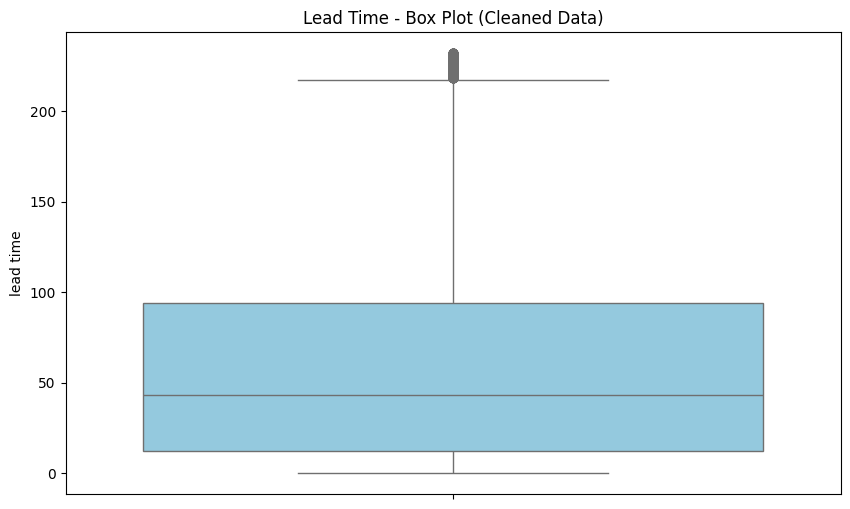

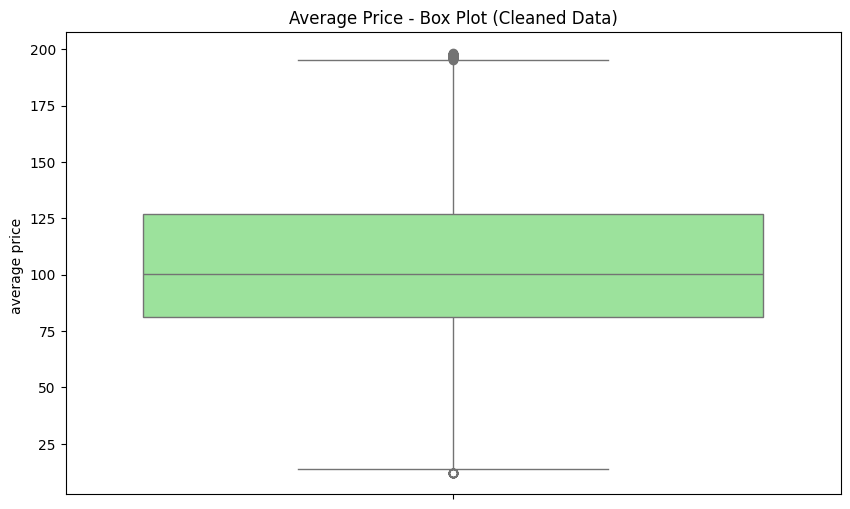

In [ ]:
plt.figure(figsize=(10, 6))

# Box plot for 'lead time'
sns.boxplot(data=cleaned_data['lead time'], color='skyblue')
plt.title('Lead Time - Box Plot (Cleaned Data)')
plt.show()

# Box plot for 'average price'
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_data['average price '], color='lightgreen')
plt.title('Average Price - Box Plot (Cleaned Data)')
plt.show()

# **Data visualization**

Visualizing data in order to understand the relationships between columns and each other.

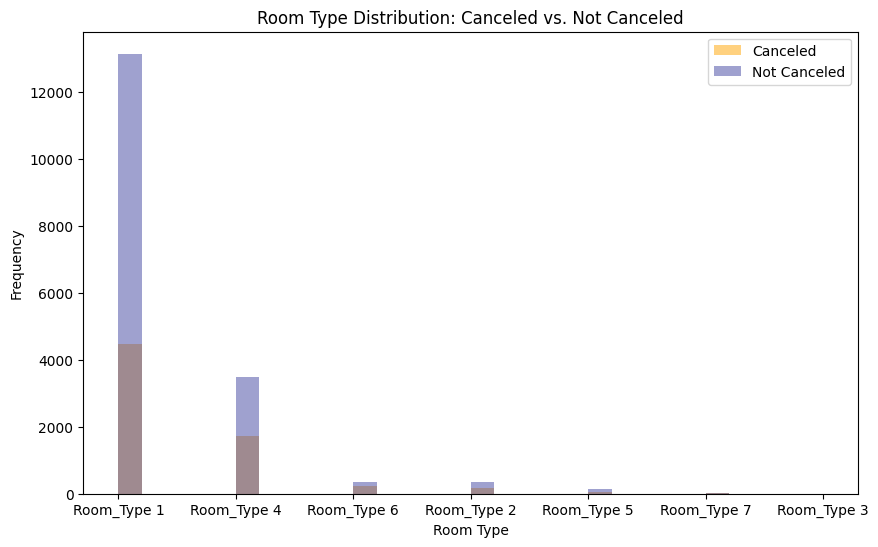

In [ ]:
# Focusing on cancellation

# Cancellation vs. Room Type shows how cancellation status (Canceled or not Canceled) is distributed across different room types.

plt.figure(figsize=(10, 6))

# Filter data for 'Canceled' bookings and 'Not Canceled' bookings
plt.hist(cleaned_data[cleaned_data['booking status'] == 'Canceled']['room type'],
         bins=30, alpha=0.5, label='Canceled', color='orange')
plt.hist(cleaned_data[cleaned_data['booking status'] == 'Not_Canceled']['room type'],
         bins=30, alpha=0.5, label='Not Canceled', color='#4045a1')

# Adding labels and title
plt.title('Room Type Distribution: Canceled vs. Not Canceled')
plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


Room type 1 had more bookings overall, while room type 3 was the least to be reserved.

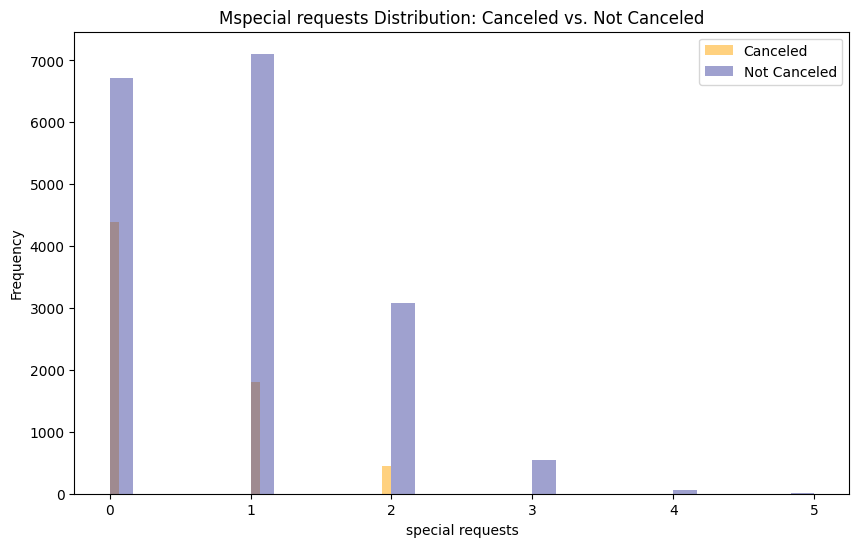

In [ ]:
# Cancellation and Special Requests

plt.figure(figsize=(10, 6))
plt.hist(cleaned_data[cleaned_data['booking status'] == 'Canceled']['special requests'],
         bins=30, alpha=0.5, label='Canceled', color='orange')
plt.hist(cleaned_data[cleaned_data['booking status'] == 'Not_Canceled']['special requests'],
         bins=30, alpha=0.5, label='Not Canceled', color='#4045a1')

# Adding labels and title
plt.title('Mspecial requests Distribution: Canceled vs. Not Canceled')
plt.xlabel('special requests')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


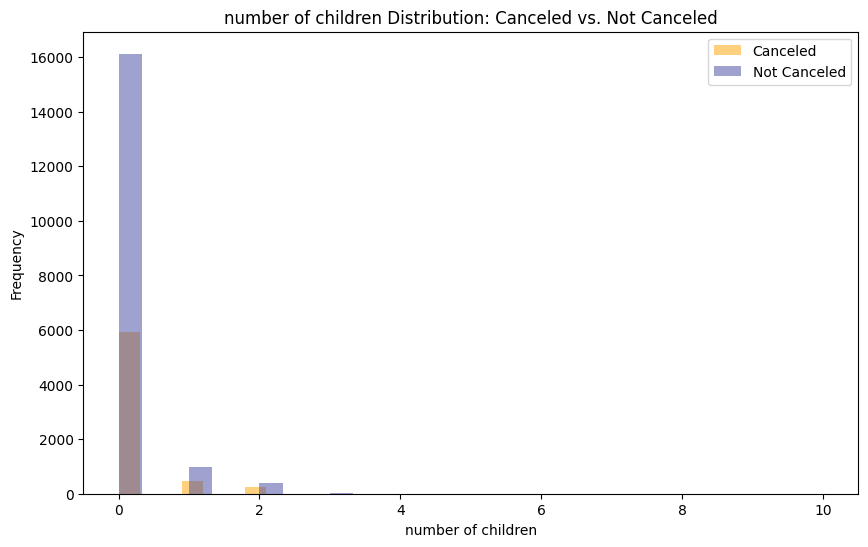

In [ ]:
# Number of Children vs Cancellation

plt.figure(figsize=(10, 6))
plt.hist(cleaned_data[cleaned_data['booking status'] == 'Canceled']['number of children'],
         bins=30, alpha=0.5, label='Canceled', color='orange')
plt.hist(cleaned_data[cleaned_data['booking status'] == 'Not_Canceled']['number of children'],
         bins=30, alpha=0.5, label='Not Canceled', color='#4045a1')

# Adding labels and title
plt.title('number of children Distribution: Canceled vs. Not Canceled')
plt.xlabel('number of children')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


From the figure above, we observe that people with 0-1 children account for the majority of reservations, as the data appears to be centered around this group.

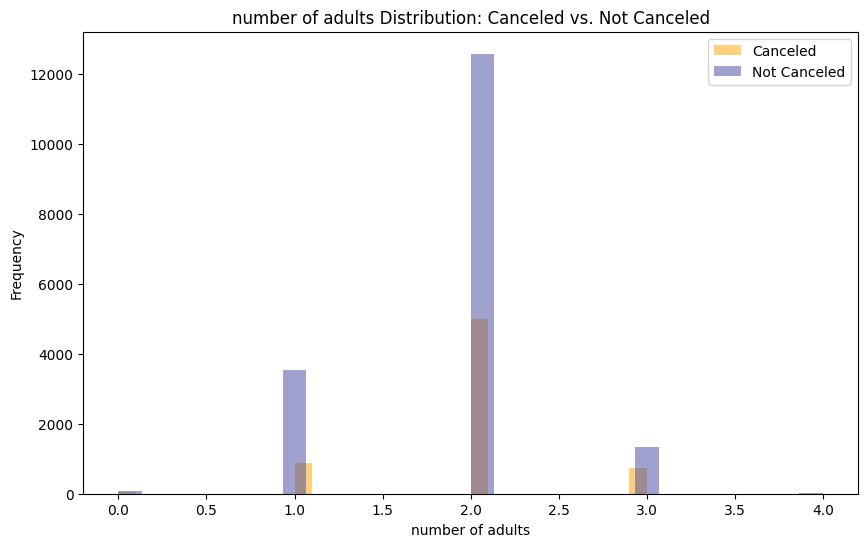

In [ ]:
# number of adults vs cancellation

plt.figure(figsize=(10, 6))
plt.hist(cleaned_data[cleaned_data['booking status'] == 'Canceled']['number of adults'],
         bins=30, alpha=0.5, label='Canceled', color='orange')
plt.hist(cleaned_data[cleaned_data['booking status'] == 'Not_Canceled']['number of adults'],
         bins=30, alpha=0.5, label='Not Canceled', color='#4045a1')

# Adding labels and title
plt.title('number of adults Distribution: Canceled vs. Not Canceled')
plt.xlabel('number of adults')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


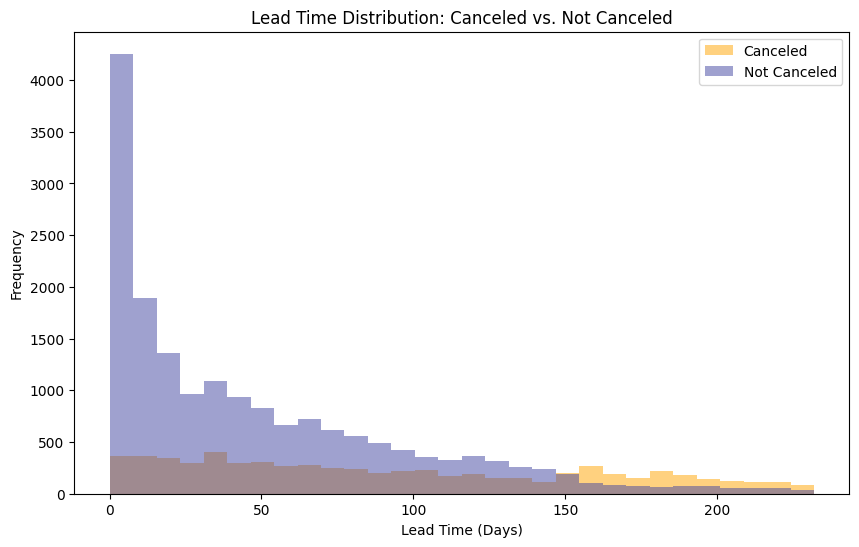

In [ ]:
# Lead time vs cancellation

plt.figure(figsize=(10, 6))
plt.hist(cleaned_data[cleaned_data['booking status'] == 'Canceled']['lead time'],
         bins=30, alpha=0.5, label='Canceled', color='orange')
plt.hist(cleaned_data[cleaned_data['booking status'] == 'Not_Canceled']['lead time'],
         bins=30, alpha=0.5, label='Not Canceled', color='#4045a1')

# Adding labels and title
plt.title('Lead Time Distribution: Canceled vs. Not Canceled')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


From the above plot, I can see:

The frequency of non-canceled bookings increases as the lead time decreases, and vice versa. Additionally, it appears that the rate of cancellations remains relatively consistent across different lead times, staying within a similar range.

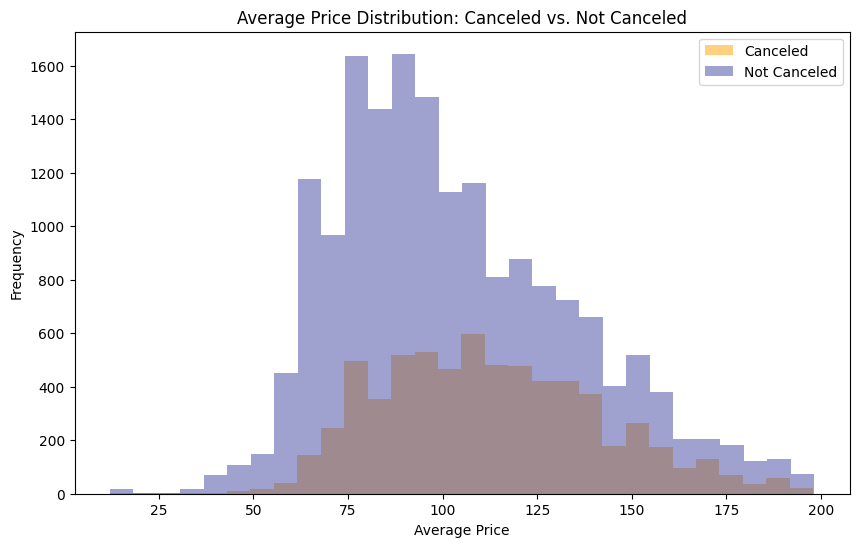

In [ ]:
# Cancellation and average price

plt.figure(figsize=(10, 6))
plt.hist(cleaned_data[cleaned_data['booking status'] == 'Canceled']['average price '],
         bins=30, alpha=0.5, label='Canceled', color='orange')
plt.hist(cleaned_data[cleaned_data['booking status'] == 'Not_Canceled']['average price '],
         bins=30, alpha=0.5, label='Not Canceled', color='#4045a1')

# Adding labels and title
plt.title('Average Price Distribution: Canceled vs. Not Canceled')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


The figure displaying the Average Price Distribution and Booking Status reveals an approximately normal distribution for both canceled and non-canceled bookings. This suggests the following insights:

Price alone does not appear to have a strong influence on the booking status.

Other factors may play a more significant role in determining whether a booking is canceled or not.

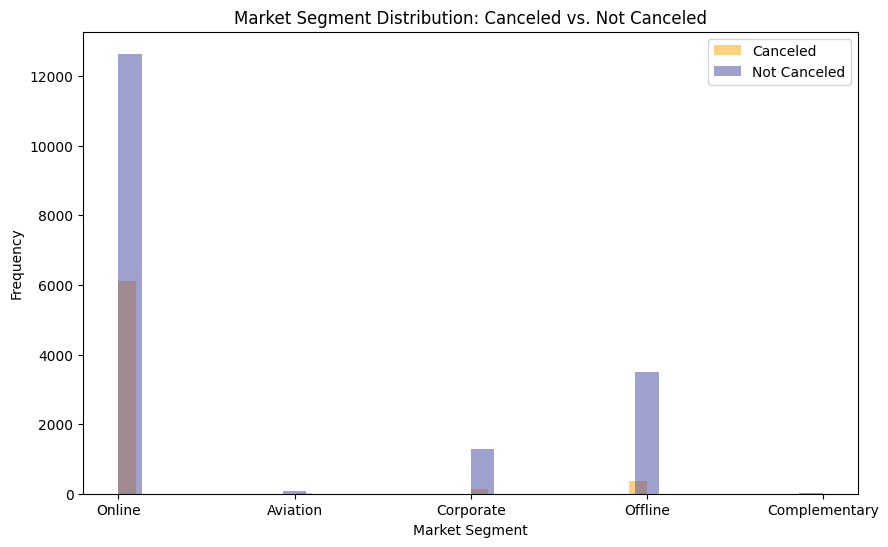

In [ ]:
# Cancellation and Market Segment

plt.figure(figsize=(10, 6))
plt.hist(cleaned_data[cleaned_data['booking status'] == 'Canceled']['market segment type'],
         bins=30, alpha=0.5, label='Canceled', color='orange')
plt.hist(cleaned_data[cleaned_data['booking status'] == 'Not_Canceled']['market segment type'],
         bins=30, alpha=0.5, label='Not Canceled', color='#4045a1')

# Adding labels and title
plt.title('Market Segment Distribution: Canceled vs. Not Canceled')
plt.xlabel('Market Segment')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


From the graph above, we can see that:

The online segment has the highest number of bookings, which means it plays the biggest role in whether a booking is made or not. This makes sense because most people find it easy and convenient to book things online.

On the other hand, the aviation and complementary segments have very few bookings, so they don’t seem to have much of an impact.

This tells us that focusing on improving the online booking experience could help attract more customers. It might also be worth looking into why the other segments aren’t contributing much and if there’s a way to make them more effective.

In [ ]:
new_data.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price ', 'special requests', 'date of reservation',
       'booking status'],
      dtype='object')

# **Notes on the Previous Plots (Overall)**
We’re looking at how customers’ booking behavior changes based on:

Timing (lead time),

Preferences (room type),

Booking method (online), and

Price.

Here’s what stands out:

Lead time and room type preferences seem to play a big role in whether customers book or cancel.

Online bookings have the biggest impact on booking decisions, while other methods (like aviation or complementary segments) don’t contribute as much.

Price doesn’t seem to be the main reason for cancellations. Instead, factors like room availability, booking platform, and lead time might be more important.

#Continuing to visualize data

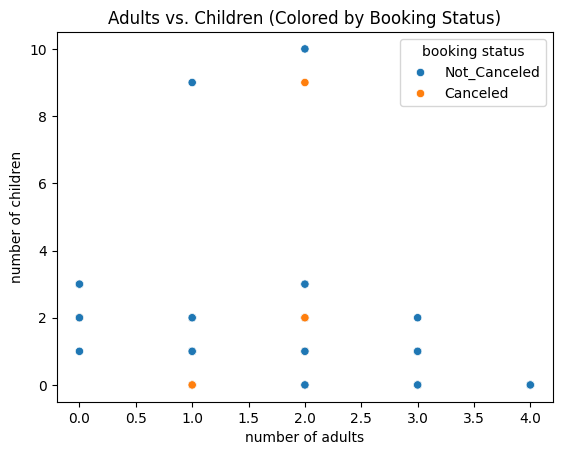

In [ ]:
#Relation between number of adults to number of children

sns.scatterplot(data=cleaned_data, x='number of adults', y='number of children', hue='booking status')
plt.title('Adults vs. Children (Colored by Booking Status)')
plt.show()

From the scatter plot above, there is no clear relationship between the number of adults, number of children, and booking status (canceled or not canceled).

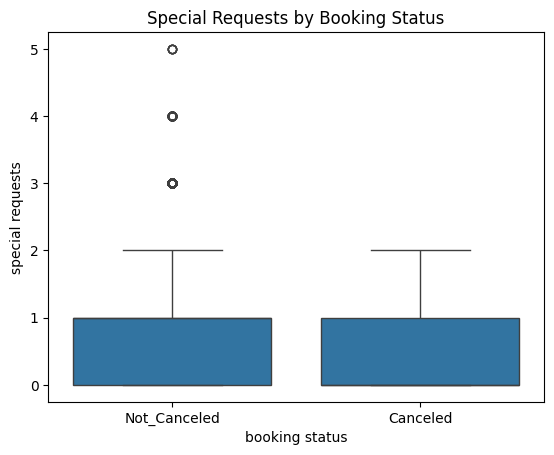

In [ ]:
#The relation between cancelled and not cancelled booking with the special requests.

sns.boxplot(data=cleaned_data, x='booking status', y='special requests')
plt.title('Special Requests by Booking Status')
plt.show()

# From the box plot above, we observe that:

- Not Canceled bookings tend to have a slightly higher median number of special requests compared to Canceled bookings.
- There are three outliers in the Not Canceled category, indicating some bookings had higher special requests than usual.
- The interquartile range (IQR) for Not Canceled bookings appears wider than for Canceled bookings, suggesting more variability in special requests.
- This could indicate that guests who make special requests are slightly more likely to complete their bookings.

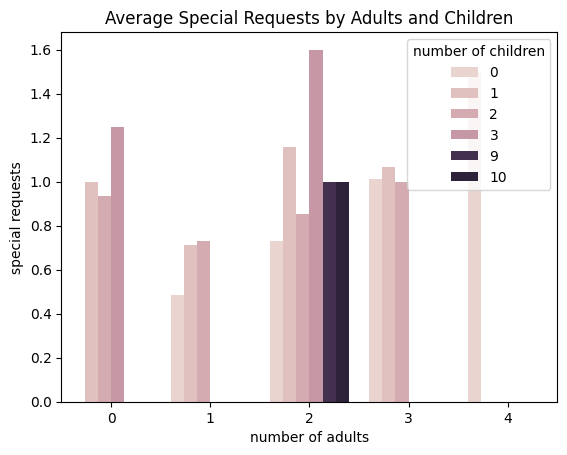

In [ ]:
grouped = cleaned_data.groupby(['number of adults', 'number of children'])['special requests'].mean().reset_index()
sns.barplot(data=grouped, x='number of adults', y='special requests', hue='number of children')
plt.title('Average Special Requests by Adults and Children')
plt.show()

There is no clear relationship between the number of adults and the number of children. However, bookings with two or more children tend to have more special requests compared to those with fewer than two children. This suggests that families with more children might have additional needs or preferences during their stay.

#Heat map for the relations

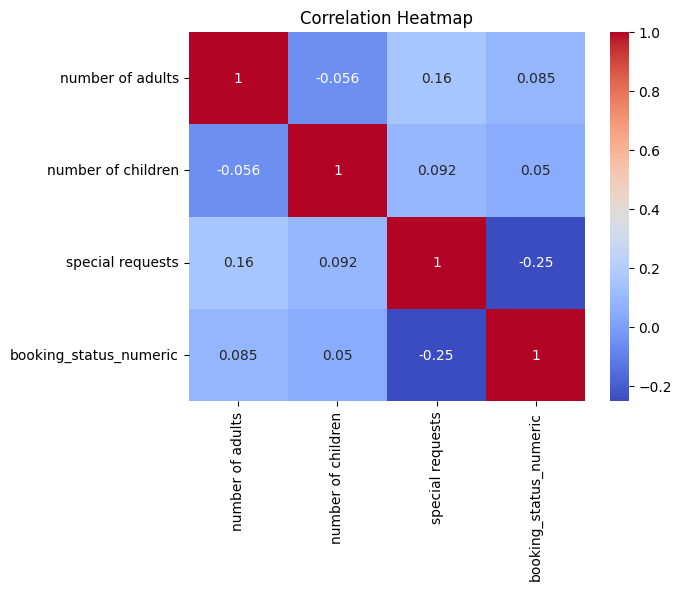

In [ ]:
# Convert 'booking status' to numerical representation before calculating correlation
cleaned_data['booking_status_numeric'] = cleaned_data['booking status'].map({'Canceled': 1, 'Not_Canceled': 0})

# Calculate correlation using the numerical representation
sns.heatmap(cleaned_data[['number of adults', 'number of children', 'special requests', 'booking_status_numeric']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


The correlation heatmap shows weak relationships between the analyzed features and booking status. The strongest correlation is between special requests and booking status at -0.25, suggesting that customers with more special requests are slightly less likely to cancel. However, most features in the heatmap don’t show strong linear relationships with cancellations, indicating that other factors or non-linear patterns may be more influential

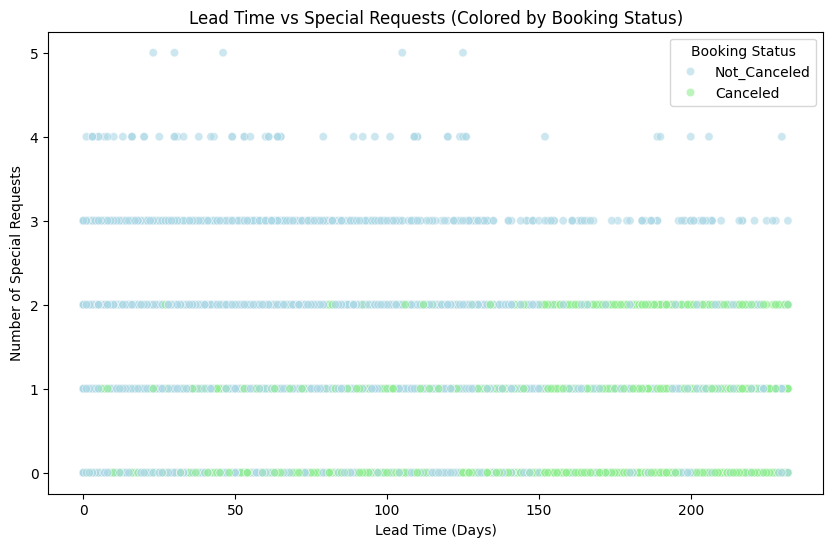

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_data, x='lead time', y='special requests', hue='booking status',
                palette={'Canceled': 'lightgreen', 'Not_Canceled': 'lightblue'}, alpha=0.6)

plt.title('Lead Time vs Special Requests (Colored by Booking Status)')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Number of Special Requests')
plt.legend(title="Booking Status")
plt.show()


Observation :

- Cancellation decreases as the number of special requests increases.

- Customers who make more special requests are less likely to cancel their bookings.
- This could be because they have specific needs and are more committed to their stay.
- Cancellation increases as lead time increases.

- The longer the lead time, the higher the chances of cancellation.
Customers who book far in advance might change their plans, find better deals, or cancel for other reasons.


Note: There is a negative correlation between lead time and special requests. As lead time increases, the number of special requests tends to decrease. This suggests that guests who book closer to the check-in date are more likely to have specific needs, leading to more special requests. Additionally, bookings with more special requests have a lower cancellation rate, while bookings made far in advance are more prone to cancellation.

# Overall noted and observation :


1. **Room Type and Cancellation:**
   - **Room Types 1 and 4** tend to have the highest number of bookings, with **Room Type 3 and 7** being booked the least.
   - The cancellation rate appears to be relatively high across all room types, but **Room Type 1** has more cancellations than others.
  
2. **Lead Time and Cancellation:**
   - A **positive correlation** is observed between **lead time** and **cancellation**, meaning that bookings made far in advance have a higher chance of being canceled. This could be due to changing plans or guests finding better options later on.
  
3. **Average Price and Cancellation:**
   - The **average price** for both **canceled** and **not canceled** bookings is almost normally distributed. This suggests that price does not have a **strong effect** on whether a booking is canceled or not, as cancellations are spread across various price points.

4. **Market Segment and Cancellation:**
   - The **Online** segment has the highest number of bookings and cancellations, indicating its significant influence on booking behavior. The **Aviation** and **Complementary** segments have a smaller impact.
  
5. **Number of Adults, Children, and Special Requests:**
   - There's **no strong relationship** between the **number of adults and children**, but bookings with **2 or more children** tend to have **more special requests**.
   - Special requests appear to have **a slight correlation with booking status**: bookings with more special requests tend to have a lower cancellation rate.
  
6. **Lead Time vs Special Requests:**
   - As **lead time increases**, the number of special requests tends to **decrease**, suggesting that guests who book closer to the date may have more specific needs or requests.
   - There is also an observed relationship where bookings with **more special requests** are **less likely to be canceled**, while longer lead times tend to increase the chance of cancellation.
  
---

### **Summary**
- **Room Type and Lead Time** play a significant role in cancellation rates, with **Room Type 1** and longer lead times being more prone to cancellations.
- **Special requests** seem to influence the likelihood of cancellations, with bookings that involve special requests having **lower cancellation rates**.
- **Market segment** is another important factor, with **Online** being the dominant segment.

Overall, these insights suggest that **lead time, room type, special requests, and market segment** are the most relevant factors that affect booking cancellations.

---
